In [10]:
import matplotlib.pyplot as plt
from math import atan2
import numpy as np

In [2]:
class point:
    def __init__(self,coordx,coordy):
        self.x = coordx
        self.y = coordy

class group:
    points_group = []
    def __init__(self):
        self.points_group = []

    def add_point(self,point):
        self.points_group.append(point)

In [4]:
#definindo o arquivo que queremos ler
fileName = input("Escreva o nome do arquivo: ")

# lendo arquivo de entrada e criando lista de pontos
# abrindo arquivo para leitura
file = open(fileName,"r")
lines = file.readlines()
# filtrando linhas retirando tudo ate a linha @data
lines = lines[lines.index("@data\n")+1:]

# separando as linhas para 70% treino e 30% teste
treinamento = lines[:int(len(lines)*0.7)]
teste = lines[int(len(lines)*0.7):]

# criando grupos
group1 = group()
group2 = group()

# preenchendo grupos com pontos, sendo que grupo1 sao os pontos da classe 1.0 e grupo2 sao os pontos da classe -1.0
for line in treinamento:
    line = line.split(',')
    if float(line[2]) == 1.0:
        group1.add_point(point(float(line[0]),float(line[1])))
    else:
        group2.add_point(point(float(line[0]),float(line[1])))

# ordenando os pontos de cada grupo em ordem do menor y para o maior y
# para criterio de desempate, ordena-se pelo menor x
group1.points_group.sort(key=lambda point: (point.y,point.x))
group2.points_group.sort(key=lambda point: (point.y,point.x))

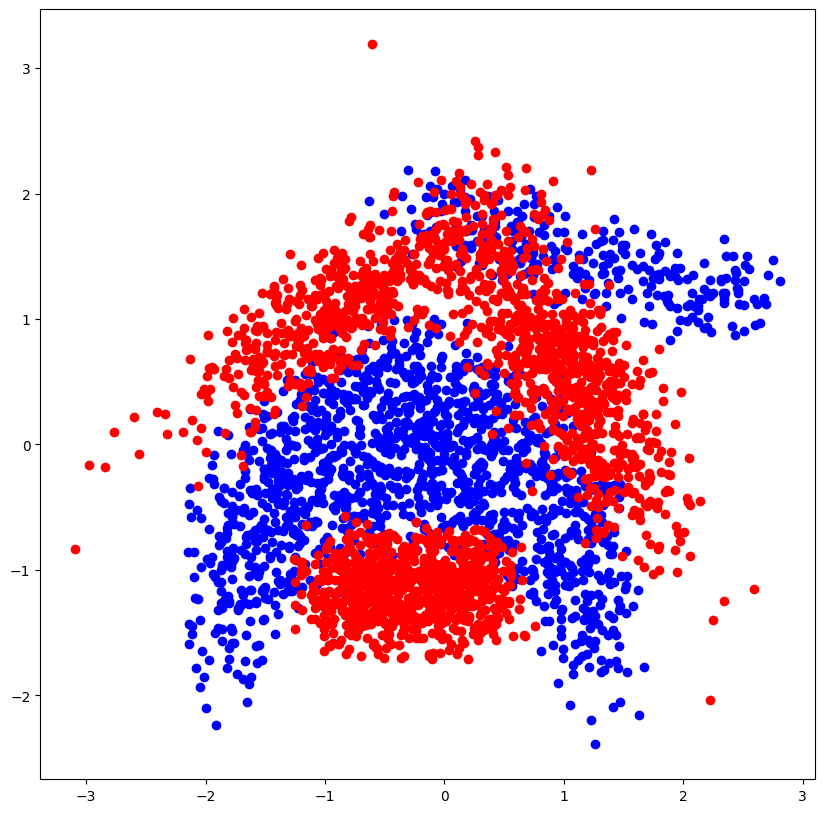

In [5]:
# plotando pontos
# criando figura
fig = plt.figure(figsize=(10,10))
# criando subplot
ax = fig.add_subplot(111)
# plotando pontos do grupo 1
for point in group1.points_group:
    ax.scatter(point.x,point.y,color='b')
# plotando pontos do grupo 2
for point in group2.points_group:
    ax.scatter(point.x,point.y,color='r')
# mostrando figura
plt.show()

## Plot feixo convexo do conjunto dos pontos em dois gráficos separados

In [11]:
def orientation(p, q, r):
    """
    Função para verificar a orientação dos pontos (p, q, r).
    Retorna os seguintes valores:
    -1 se estão no sentido horário.
    0 se são colineares.
    1 se estão no sentido anti-horário.
    """
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def graham_scan(points):
    n = len(points)
    if n < 3:
        return []

    # Encontre o ponto com a menor coordenada y (e à esquerda, se houver um empate)
    min_point = min(points, key=lambda point: (point.y, point.x))
    
    # Classifique os pontos com base em suas polaridades em relação ao ponto mínimo
    sorted_points = sorted(points, key=lambda point: (atan2(point.y - min_point.y, point.x - min_point.x), point.x, point.y))

    # Inicialize a pilha e adicione os dois primeiros pontos
    stack = [sorted_points[0], sorted_points[1]]

    # Itere pelos pontos restantes
    for i in range(2, n):
        while len(stack) > 1 and orientation(stack[-2], stack[-1], sorted_points[i]) != -1:
            stack.pop()
        stack.append(sorted_points[i])

    return stack

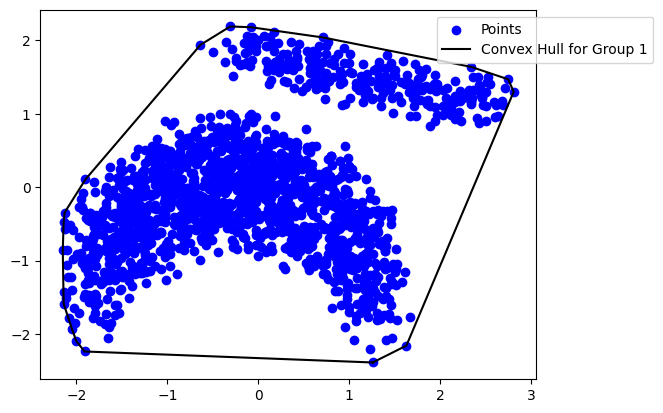

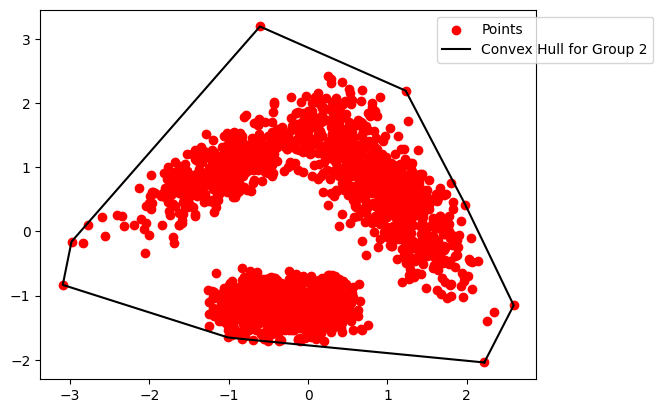

In [18]:
# Agrupando pontos dos dois grupos
group1_all_points_x = [point.x for point in group1.points_group]
group1_all_points_y = [point.y for point in group1.points_group]
group2_all_points_x = [point.x for point in group2.points_group]
group2_all_points_y = [point.y for point in group2.points_group]

# Encontrando o convex hull para cada grupo
convex1_hull = graham_scan(group1.points_group)
convex2_hull = graham_scan(group2.points_group)

# Plot pontos grupo 1
group1_x = [point.x for point in convex1_hull] + [convex1_hull[0].x]
group1_y = [point.y for point in convex1_hull] + [convex1_hull[0].y]
plt.scatter(group1_all_points_x, group1_all_points_y, color='b', label='Points')
plt.plot(group1_x, group1_y, color='black', label='Convex Hull for Group 1')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

# Plot pontos grupo 2
group2_x = [point.x for point in convex2_hull] + [convex2_hull[0].x]
group2_y = [point.y for point in convex2_hull] + [convex2_hull[0].y]
plt.scatter(group2_all_points_x, group2_all_points_y, color='r', label='Points')
plt.plot(group2_x, group2_y, color='black', label='Convex Hull for Group 2')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

## Plot do feixo convexo do conjunto dos pontos em um gráfico só

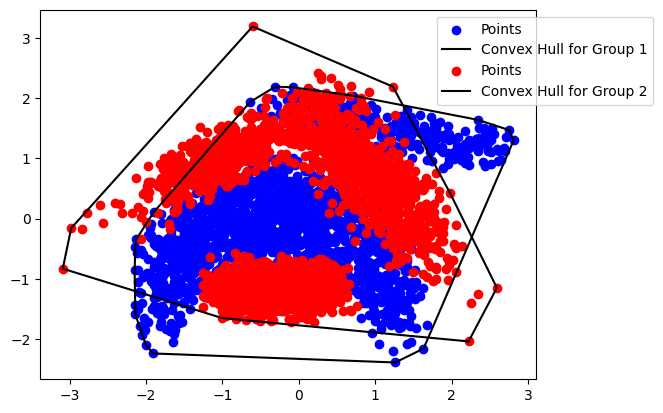

In [19]:
plt.scatter(group1_all_points_x, group1_all_points_y, color='b', label='Points')
plt.plot(group1_x, group1_y, color='black', label='Convex Hull for Group 1')
plt.scatter(group2_all_points_x, group2_all_points_y, color='r', label='Points')
plt.plot(group2_x, group2_y, color='black', label='Convex Hull for Group 2')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [28]:
def distance_squared(point1, point2):
    return (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2

def closest_points(hull_group1, hull_group2):
    min_distance = float('inf')
    closest_points = None
    
    for point1 in hull_group1:
        for point2 in hull_group2:
            distance = distance_squared([point1.x, point1.y], [point2.x, point2.y])
            if distance < min_distance:
                min_distance = distance
                closest_points = [[point1.x, point1.y], [point2.x, point2.y]]

    return closest_points


In [29]:
print(closest_points(convex1_hull, convex2_hull))

[[0.713, 2.04], [1.23, 2.19]]


In [80]:
# Decide qual dos pontos mais proximos entre si está mais proximo de p
def decider(p):
    # Calcula a distancia de p para os pontos mais proximos entre si
    d1 = distance_squared(p, closest_points(convex1_hull, convex2_hull)[0])
    d2 = distance_squared(p, closest_points(convex1_hull, convex2_hull)[1])
    # Retorna o ponto mais proximo de p
    if d1 < d2:
        return closest_points(convex1_hull, convex2_hull)[0]
    else:
        return closest_points(convex1_hull, convex2_hull)[1]
